In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

In [3]:
df = pd.read_csv('apple_quality.csv')
data = df.drop(index = 4000)
le = LabelEncoder()
data['Quality'] =le.fit_transform(data['Quality'])
scaler = MinMaxScaler()
df = scaler.fit_transform(data)
df = pd.DataFrame(df,columns=data.columns)
del df['A_id']
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,1.0
1,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1.0
2,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0.0
3,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1.0
4,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1.0
...,...,...,...,...,...,...,...,...
3995,0.531867,0.470029,0.239644,0.477379,0.574794,0.618866,0.495885,0.0
3996,0.505867,0.703146,0.504203,0.395971,0.449218,0.364566,0.614957,1.0
3997,0.333173,0.387278,0.335661,0.490846,0.612443,0.811182,0.393744,0.0
3998,0.231869,0.415014,0.697913,0.428137,0.609571,0.463966,0.331650,1.0


In [4]:
X = df.drop('Quality',axis=1)
y = df["Quality"]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)

Iteration 1, loss = 0.13376490
Iteration 2, loss = 0.10003401
Iteration 3, loss = 0.08963183
Iteration 4, loss = 0.08547483
Iteration 5, loss = 0.08151155
Iteration 6, loss = 0.07351720
Iteration 7, loss = 0.06926654
Iteration 8, loss = 0.06323938
Iteration 9, loss = 0.06527591
Iteration 10, loss = 0.05715143
Iteration 11, loss = 0.06072003
Iteration 12, loss = 0.05571949
Iteration 13, loss = 0.05339297
Iteration 14, loss = 0.05565857
Iteration 15, loss = 0.05648772
Iteration 16, loss = 0.05571110
Iteration 17, loss = 0.05275820
Iteration 18, loss = 0.05617661
Iteration 19, loss = 0.05640796
Iteration 20, loss = 0.05776643
Iteration 21, loss = 0.05004105
Iteration 22, loss = 0.05120511
Iteration 23, loss = 0.04915569
Iteration 24, loss = 0.04956269
Iteration 25, loss = 0.05680580
Iteration 26, loss = 0.05138011
Iteration 27, loss = 0.05332844
Iteration 28, loss = 0.05452000
Iteration 29, loss = 0.05346803
Iteration 30, loss = 0.05068297
Iteration 31, loss = 0.04899661
Iteration 32, los

c:\Users\beach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


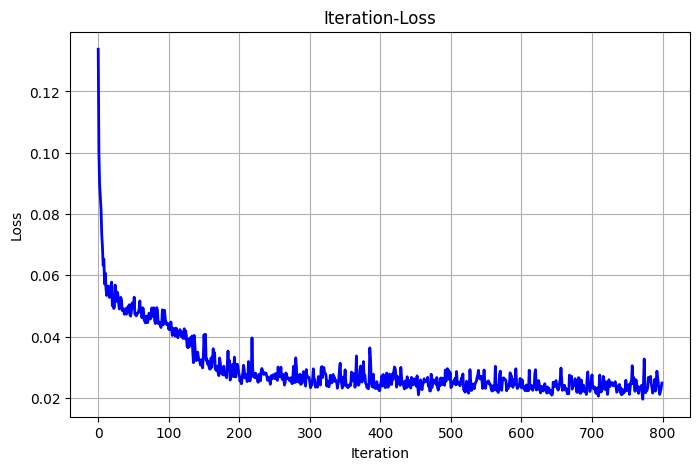

,loss,'squared_error'
,hidden_layer_sizes,"(98, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.01
,batch_size,128
,learning_rate,'constant'
,learning_rate_init,0.01
,power_t,0.5
,max_iter,800
,shuffle,True


In [57]:
model_3 = MLPRegressor(activation='relu',
                       random_state=18,
                       hidden_layer_sizes=(98,49,32,16),
                       alpha=0.01,
                       batch_size=128,
                       solver='adam',
                       verbose=True,
                       max_iter=800,
                       n_iter_no_change=300,
                       learning_rate_init=0.01,
                       momentum=0.9)
model_3.fit(X_train,y_train)
y_pred_test = model_3.predict(X_test)
y_pred_train = model_3.predict(X_train)
r2_test = r2_score(y_test,y_pred_test)
r2_train = r2_score(y_train,y_pred_train)
print(f'r2_test: {r2_test},  r2_train  : {r2_train}')
plt.figure(figsize=(8,5))
plt.plot(model_3.loss_curve_, color='b', linewidth=2)
plt.title('Iteration-Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
model_3